This notebook trains a 2-layer NN on k-AND problem with varying postiive/negative sample distribution in train data.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import data
import train

In [3]:
disjoint_mixed_pool = data.create_mixed_clause_pool_random_disjoint(
    global_input_dim=32,
    pool_size=256,
    features_per_and=4,
    seed=8,
)

In [4]:
# Create formula with disjoint clauses
formula = disjoint_mixed_pool[:4]
formula

[[(5, False), (8, False), (19, False), (23, False)],
 [(10, False), (18, False), (24, False), (30, False)],
 [(3, False), (13, False), (21, False), (25, False)],
 [(9, False), (17, False), (20, False), (26, False)]]

In [5]:
dset = data.create_dataset(
    cset=formula,
    input_dim=32,
    train_size=100,
    test_size=100,
    min_true_vars=4,
    max_true_vars=8,
    batch_size=64,
)

In [6]:
train_data, test_data = dset
agg_steps = list(range(0, 512, 32))
plot_steps = list(range(0, 512, 32))

In [7]:
y = train_data.tensors[1]
y.sum() / len(y)

tensor(0.5000)

In [8]:
len(y)

100

orig: using new random 4-AND formula => [[(5, False), (8, False), (19, False), (23, False)], [(10, False), (18, False), (24, False), (30, False)], [(3, False), (13, False), (21, False), (25, False)], [(9, False), (17, False), (20, False), (26, False)]]
orig: epoch=0/5, trainErr: 0.69, testErr: 0.38, 0P4N_pos: 8.00, 0P4N_neg: 5.00, 1P3N_pos: 19.00, 1P3N_neg: 9.00, 2P2N_pos: 35.00, 2P2N_neg: 15.00, 3P1N_pos: 13.00, 3P1N_neg: 16.00, 4P0N_pos: 5.00, 4P0N_neg: 3.00, total_kp_pos: 5.00, sum_of_clauseOverlaps_kp_pos: 1.00, overlap_kp_pos_with_prior: 0.00, total_kp_neg: 3.00, sum_of_clauseOverlaps_kp_neg: 0.00, overlap_kp_neg_with_prior: 0.00
orig: epoch=0/5, trainErr: 0.69, testErr: 0.41, 0P4N_pos: 8.00, 0P4N_neg: 5.00, 1P3N_pos: 19.00, 1P3N_neg: 9.00, 2P2N_pos: 35.00, 2P2N_neg: 15.00, 3P1N_pos: 13.00, 3P1N_neg: 16.00, 4P0N_pos: 5.00, 4P0N_neg: 3.00, total_kp_pos: 5.00, sum_of_clauseOverlaps_kp_pos: 1.00, overlap_kp_pos_with_prior: 5.00, total_kp_neg: 3.00, sum_of_clauseOverlaps_kp_neg: 0.00,

orig: epoch=32/5, trainErr: 0.67, testErr: 0.48, 0P4N_pos: 9.00, 0P4N_neg: 3.00, 1P3N_pos: 18.00, 1P3N_neg: 11.00, 2P2N_pos: 21.00, 2P2N_neg: 25.00, 3P1N_pos: 18.00, 3P1N_neg: 14.00, 4P0N_pos: 6.00, 4P0N_neg: 3.00, total_kp_pos: 6.00, sum_of_clauseOverlaps_kp_pos: 1.00, overlap_kp_pos_with_prior: 5.00, total_kp_neg: 3.00, sum_of_clauseOverlaps_kp_neg: 0.00, overlap_kp_neg_with_prior: 3.00
orig: epoch=64/5, trainErr: 0.64, testErr: 0.39, 0P4N_pos: 11.00, 0P4N_neg: 1.00, 1P3N_pos: 15.00, 1P3N_neg: 14.00, 2P2N_pos: 23.00, 2P2N_neg: 24.00, 3P1N_pos: 11.00, 3P1N_neg: 15.00, 4P0N_pos: 12.00, 4P0N_neg: 2.00, total_kp_pos: 12.00, sum_of_clauseOverlaps_kp_pos: 3.00, overlap_kp_pos_with_prior: 6.00, total_kp_neg: 2.00, sum_of_clauseOverlaps_kp_neg: 0.00, overlap_kp_neg_with_prior: 2.00
orig: epoch=96/5, trainErr: 0.60, testErr: 0.42, 0P4N_pos: 11.00, 0P4N_neg: 0.00, 1P3N_pos: 14.00, 1P3N_neg: 16.00, 2P2N_pos: 14.00, 2P2N_neg: 30.00, 3P1N_pos: 15.00, 3P1N_neg: 12.00, 4P0N_pos: 14.00, 4P0N_neg: 2.

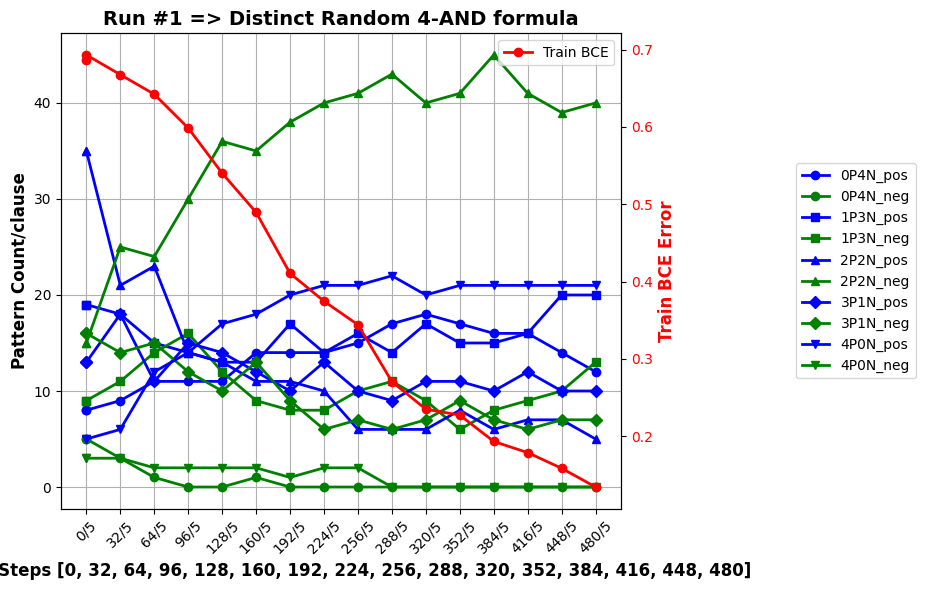

/home1/czhang/Neural-Computation/stats.py:347: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0,0,1,0.93])


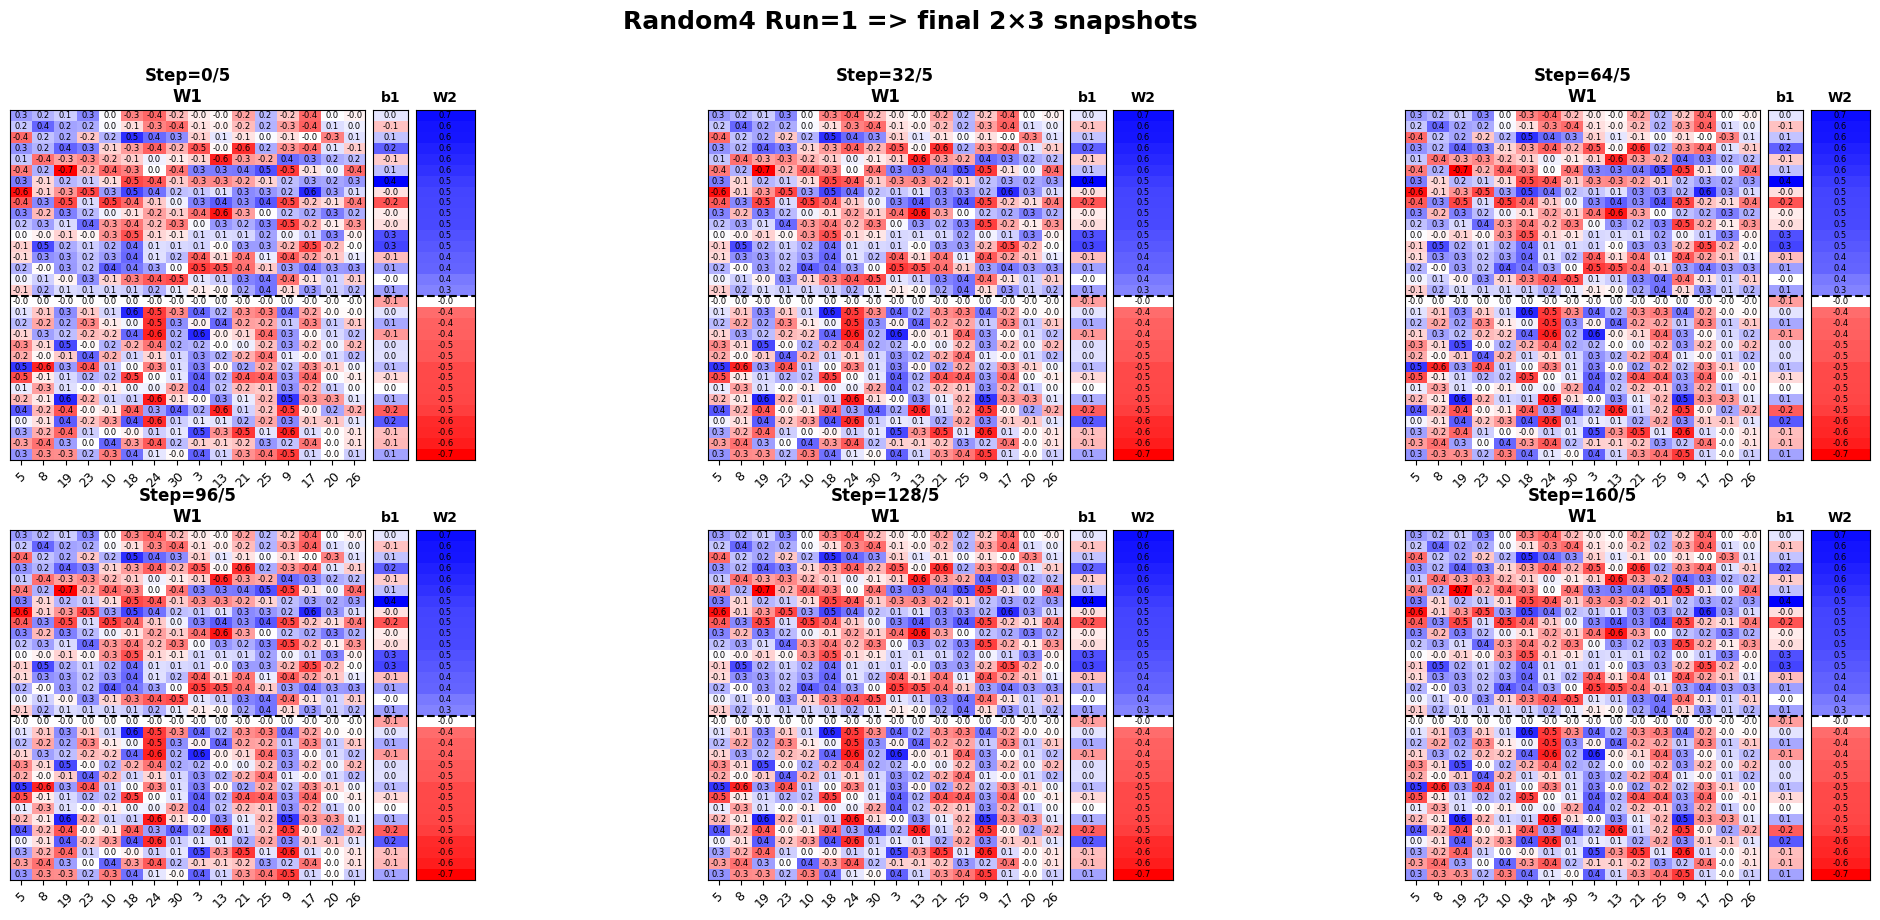

Saved => ./pdfs/Random4 Run=1_final_6snap_2x3.pdf


In [9]:
# Original set up, random labels and permutation
train_loader = data.create_dataloader(train_data, batch_size=64)
test_loader = data.create_dataloader(test_data, batch_size=64)

train.run_single_model(
    run_i=0,
    aggregator_steps=agg_steps,
    plot_steps=plot_steps,
    input_dim=32,
    hidden_dim=32,
    num_features_per_clause=4,
    train_loader=train_loader,
    test_loader=test_loader,
    run_name="orig",
    base_dir=".",
    l2_reg_factor=0,
    l1_reg_factor=1e-4,
    seed_offset=0,
    cset=formula
)

tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.5000)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.5000)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
sort_y_inc: using new random 4-AND formula => [[(5, False), (8, False), (19, False), (23, False)], [(10, False), (18, False), (24, False), (30, False)], [(3, False), (13, False), (21, False), (25, False)], [(9, False), (17, False), (20, False), (26, False)]]
sort_y_inc: epoch=0/5, trainErr: 0.70, testErr: 0.46, 0P4N_pos: 4.00, 0P4N_neg: 4.00, 1P3N_pos: 18.00, 1P3N_neg: 9.00, 2P2N_pos: 27.00, 2P2N_neg: 23.00, 3P1N_pos: 24.00, 3P1N_neg: 12.

sort_y_inc: epoch=96/5, trainErr: 0.56, testErr: 0.30, 0P4N_pos: 8.00, 0P4N_neg: 1.00, 1P3N_pos: 15.00, 1P3N_neg: 12.00, 2P2N_pos: 13.00, 2P2N_neg: 34.00, 3P1N_pos: 15.00, 3P1N_neg: 14.00, 4P0N_pos: 13.00, 4P0N_neg: 3.00, total_kp_pos: 13.00, sum_of_clauseOverlaps_kp_pos: 2.00, overlap_kp_pos_with_prior: 6.00, total_kp_neg: 3.00, sum_of_clauseOverlaps_kp_neg: 0.00, overlap_kp_neg_with_prior: 2.00
sort_y_inc: epoch=128/5, trainErr: 0.49, testErr: 0.31, 0P4N_pos: 11.00, 0P4N_neg: 1.00, 1P3N_pos: 15.00, 1P3N_neg: 8.00, 2P2N_pos: 11.00, 2P2N_neg: 39.00, 3P1N_pos: 14.00, 3P1N_neg: 13.00, 4P0N_pos: 13.00, 4P0N_neg: 3.00, total_kp_pos: 13.00, sum_of_clauseOverlaps_kp_pos: 3.00, overlap_kp_pos_with_prior: 12.00, total_kp_neg: 3.00, sum_of_clauseOverlaps_kp_neg: 0.00, overlap_kp_neg_with_prior: 3.00
sort_y_inc: epoch=160/5, trainErr: 0.42, testErr: 0.26, 0P4N_pos: 12.00, 0P4N_neg: 1.00, 1P3N_pos: 13.00, 1P3N_neg: 10.00, 2P2N_pos: 12.00, 2P2N_neg: 40.00, 3P1N_pos: 10.00, 3P1N_neg: 11.00, 4P0N_po

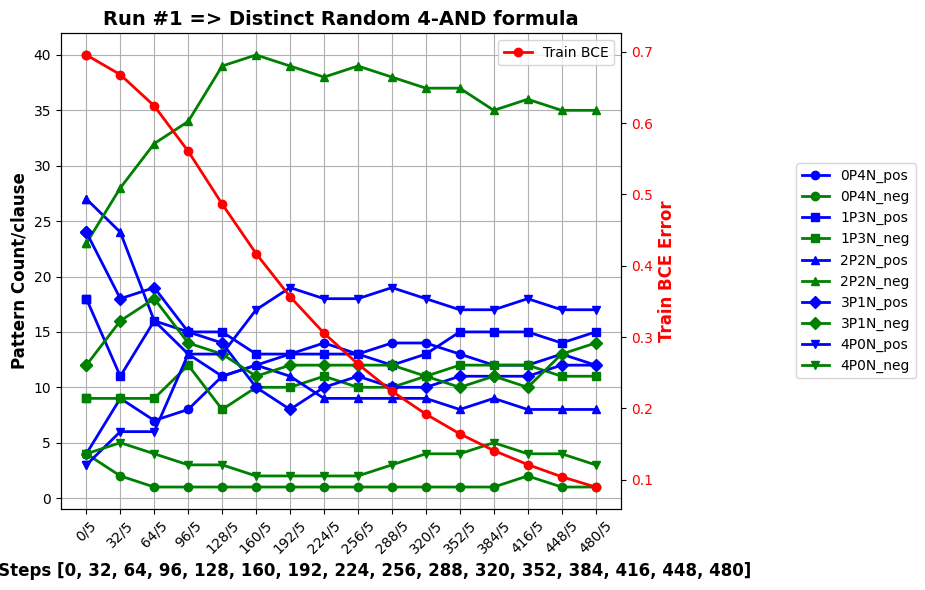

/home1/czhang/Neural-Computation/stats.py:347: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0,0,1,0.93])


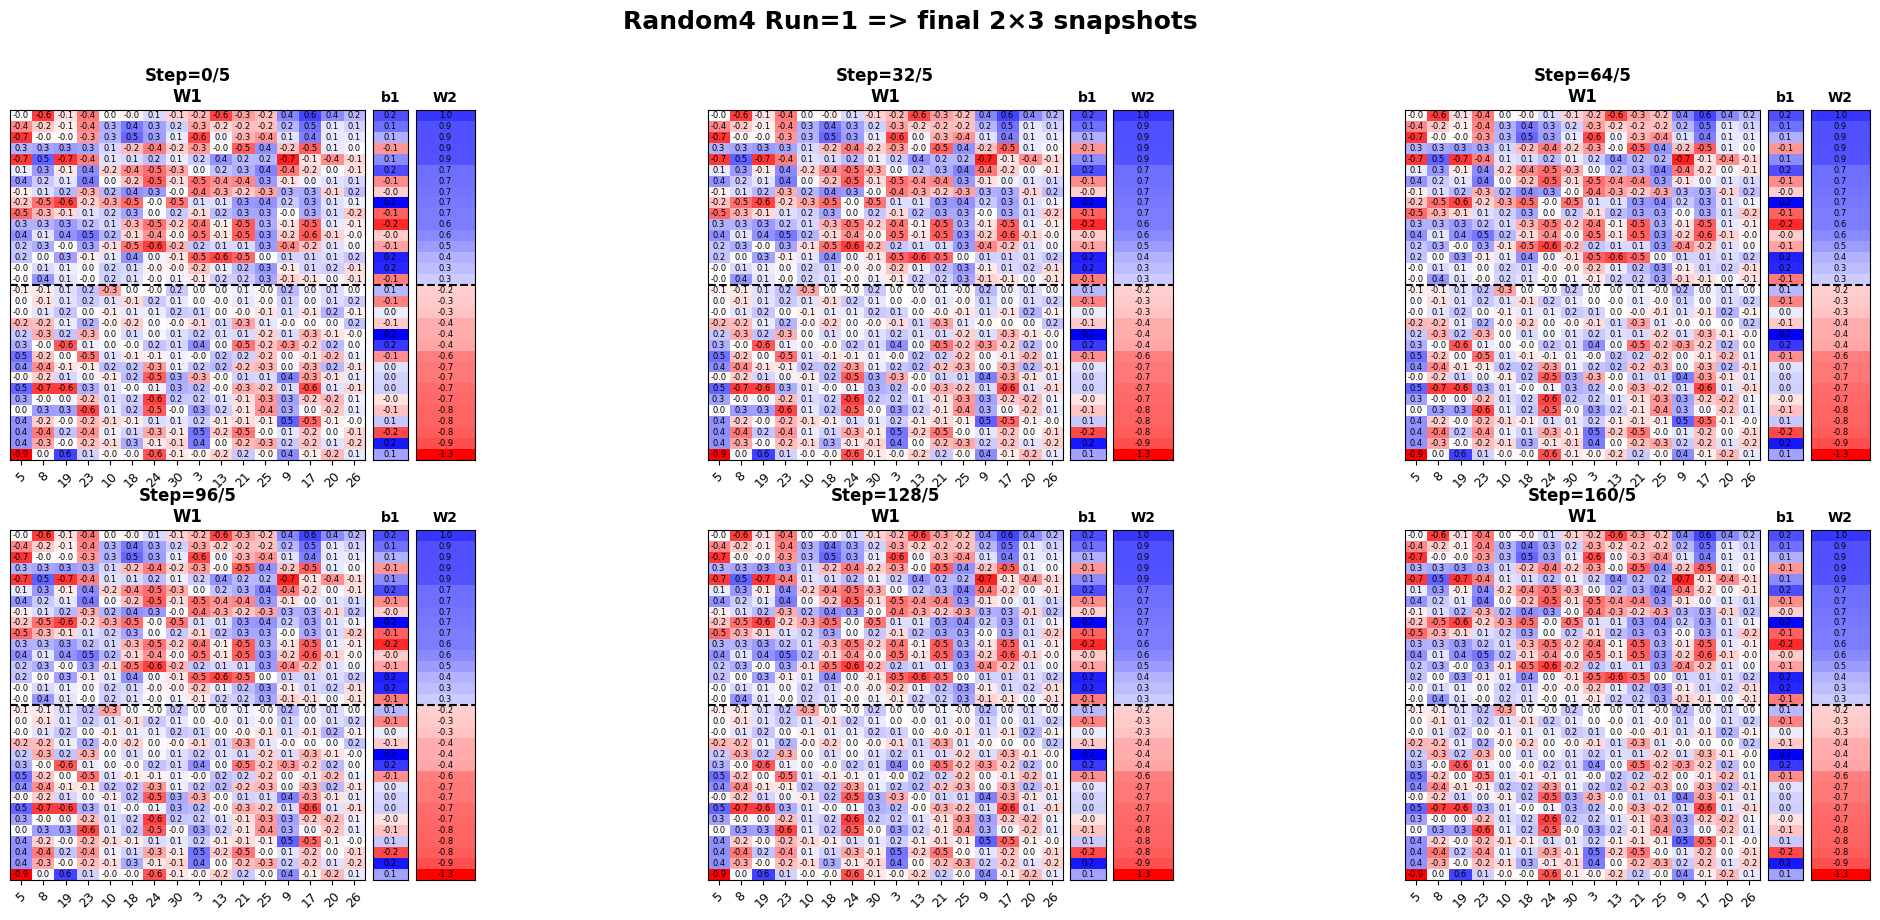

Saved => ./pdfs/Random4 Run=1_final_6snap_2x3.pdf


In [10]:
train_loader_y_inc = data.create_dataloader_sort_y(train_data, batch_size=4)
test_loader_y_inc = data.create_dataloader_sort_y(test_data, batch_size=4)

train.run_single_model(
    run_i=0,
    aggregator_steps=agg_steps,
    plot_steps=plot_steps,
    input_dim=32,
    hidden_dim=32,
    num_features_per_clause=4,
    train_loader=train_loader_y_inc,
    test_loader=test_loader_y_inc,
    run_name="sort_y_inc",
    base_dir=".",
    l2_reg_factor=0,
    l1_reg_factor=1e-4,
    seed_offset=0,
    cset=formula
)

tensor(0.7812)
tensor(0.8438)
sort_y_dec: using new random 4-AND formula => [[(5, False), (8, False), (19, False), (23, False)], [(10, False), (18, False), (24, False), (30, False)], [(3, False), (13, False), (21, False), (25, False)], [(9, False), (17, False), (20, False), (26, False)]]
sort_y_dec: epoch=0/5, trainErr: 0.66, testErr: 0.16, 0P4N_pos: 4.00, 0P4N_neg: 4.00, 1P3N_pos: 18.00, 1P3N_neg: 9.00, 2P2N_pos: 27.00, 2P2N_neg: 23.00, 3P1N_pos: 24.00, 3P1N_neg: 12.00, 4P0N_pos: 3.00, 4P0N_neg: 4.00, total_kp_pos: 3.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 0.00, total_kp_neg: 4.00, sum_of_clauseOverlaps_kp_neg: 0.00, overlap_kp_neg_with_prior: 0.00
sort_y_dec: epoch=0/5, trainErr: 0.66, testErr: 0.16, 0P4N_pos: 4.00, 0P4N_neg: 4.00, 1P3N_pos: 18.00, 1P3N_neg: 9.00, 2P2N_pos: 27.00, 2P2N_neg: 23.00, 3P1N_pos: 24.00, 3P1N_neg: 12.00, 4P0N_pos: 3.00, 4P0N_neg: 4.00, total_kp_pos: 3.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 3.00, total_k

sort_y_dec: epoch=160/5, trainErr: 0.32, testErr: 0.16, 0P4N_pos: 9.00, 0P4N_neg: 1.00, 1P3N_pos: 10.00, 1P3N_neg: 6.00, 2P2N_pos: 14.00, 2P2N_neg: 30.00, 3P1N_pos: 23.00, 3P1N_neg: 5.00, 4P0N_pos: 28.00, 4P0N_neg: 2.00, total_kp_pos: 28.00, sum_of_clauseOverlaps_kp_pos: 9.00, overlap_kp_pos_with_prior: 21.00, total_kp_neg: 2.00, sum_of_clauseOverlaps_kp_neg: 0.00, overlap_kp_neg_with_prior: 2.00
sort_y_dec: epoch=192/5, trainErr: 0.28, testErr: 0.12, 0P4N_pos: 11.00, 0P4N_neg: 0.00, 1P3N_pos: 9.00, 1P3N_neg: 6.00, 2P2N_pos: 13.00, 2P2N_neg: 32.00, 3P1N_pos: 24.00, 3P1N_neg: 5.00, 4P0N_pos: 27.00, 4P0N_neg: 1.00, total_kp_pos: 27.00, sum_of_clauseOverlaps_kp_pos: 10.00, overlap_kp_pos_with_prior: 25.00, total_kp_neg: 1.00, sum_of_clauseOverlaps_kp_neg: 0.00, overlap_kp_neg_with_prior: 1.00
sort_y_dec: epoch=224/5, trainErr: 0.23, testErr: 0.12, 0P4N_pos: 10.00, 0P4N_neg: 0.00, 1P3N_pos: 11.00, 1P3N_neg: 7.00, 2P2N_pos: 16.00, 2P2N_neg: 27.00, 3P1N_pos: 27.00, 3P1N_neg: 5.00, 4P0N_pos: 

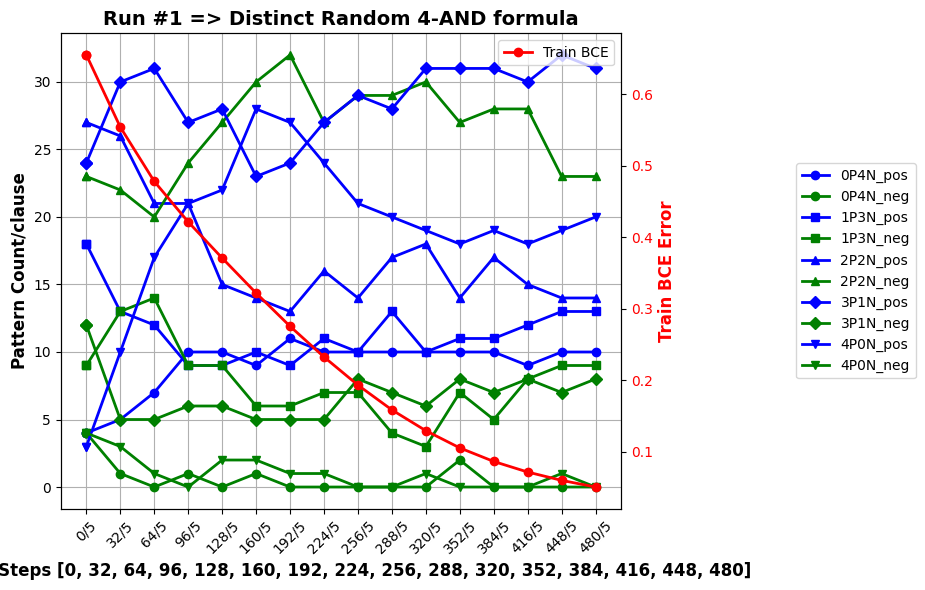

/home1/czhang/Neural-Computation/stats.py:347: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0,0,1,0.93])


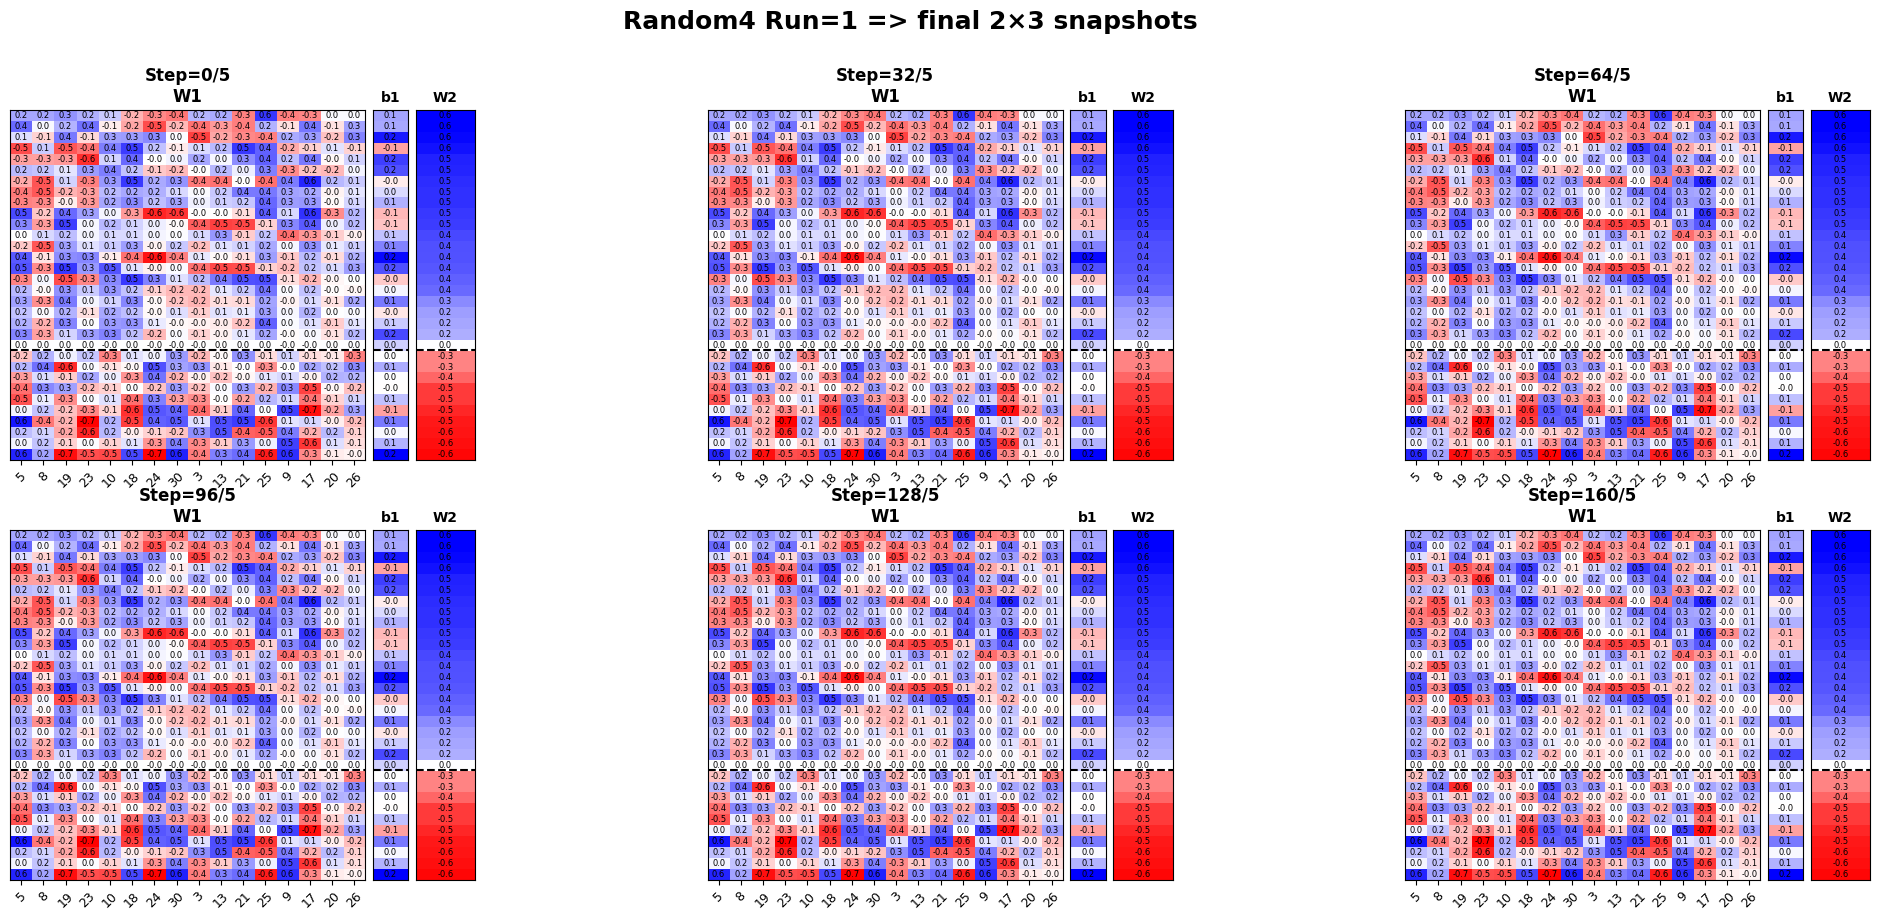

Saved => ./pdfs/Random4 Run=1_final_6snap_2x3.pdf


In [11]:
train_loader_y_dec = data.create_dataloader_sort_y(train_data, batch_size=64, increasing=False)
test_loader_y_dec = data.create_dataloader_sort_y(test_data, batch_size=64, increasing=False)

train.run_single_model(
    run_i=0,
    aggregator_steps=agg_steps,
    plot_steps=plot_steps,
    input_dim=32,
    hidden_dim=32,
    num_features_per_clause=4,
    train_loader=train_loader_y_dec,
    test_loader=test_loader_y_dec,
    run_name="sort_y_dec",
    base_dir=".",
    l2_reg_factor=0,
    l1_reg_factor=1e-4,
    seed_offset=0,
    cset=formula
)

sort_xsum_inc: using new random 4-AND formula => [[(5, False), (8, False), (19, False), (23, False)], [(10, False), (18, False), (24, False), (30, False)], [(3, False), (13, False), (21, False), (25, False)], [(9, False), (17, False), (20, False), (26, False)]]
sort_xsum_inc: epoch=0/5, trainErr: 0.69, testErr: 0.42, 0P4N_pos: 4.00, 0P4N_neg: 4.00, 1P3N_pos: 18.00, 1P3N_neg: 9.00, 2P2N_pos: 27.00, 2P2N_neg: 23.00, 3P1N_pos: 24.00, 3P1N_neg: 12.00, 4P0N_pos: 3.00, 4P0N_neg: 4.00, total_kp_pos: 3.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 0.00, total_kp_neg: 4.00, sum_of_clauseOverlaps_kp_neg: 0.00, overlap_kp_neg_with_prior: 0.00
sort_xsum_inc: epoch=0/5, trainErr: 0.69, testErr: 0.42, 0P4N_pos: 4.00, 0P4N_neg: 4.00, 1P3N_pos: 18.00, 1P3N_neg: 9.00, 2P2N_pos: 27.00, 2P2N_neg: 23.00, 3P1N_pos: 24.00, 3P1N_neg: 12.00, 4P0N_pos: 3.00, 4P0N_neg: 4.00, total_kp_pos: 3.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 3.00, total_kp_neg: 4.00, sum_of_c

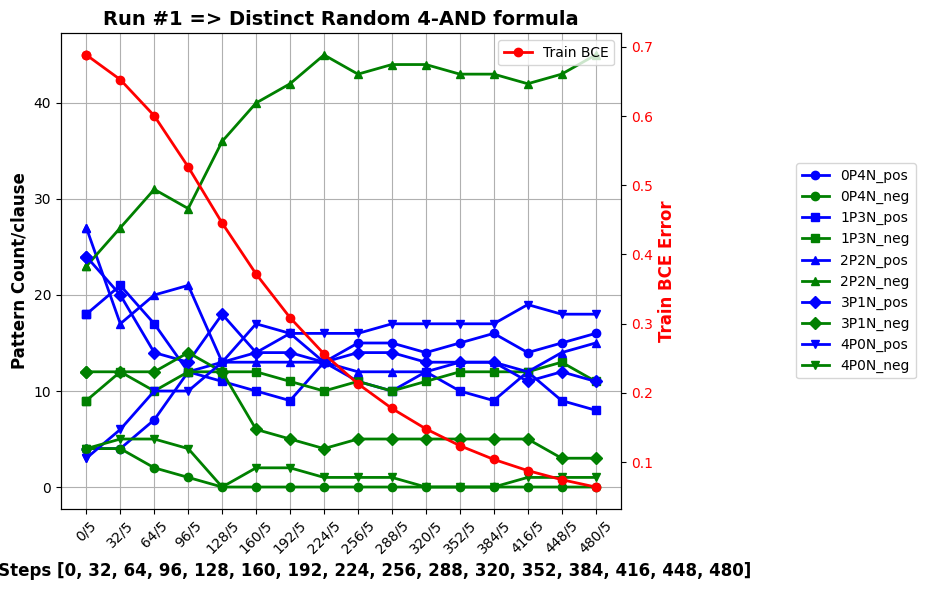

/home1/czhang/Neural-Computation/stats.py:347: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0,0,1,0.93])


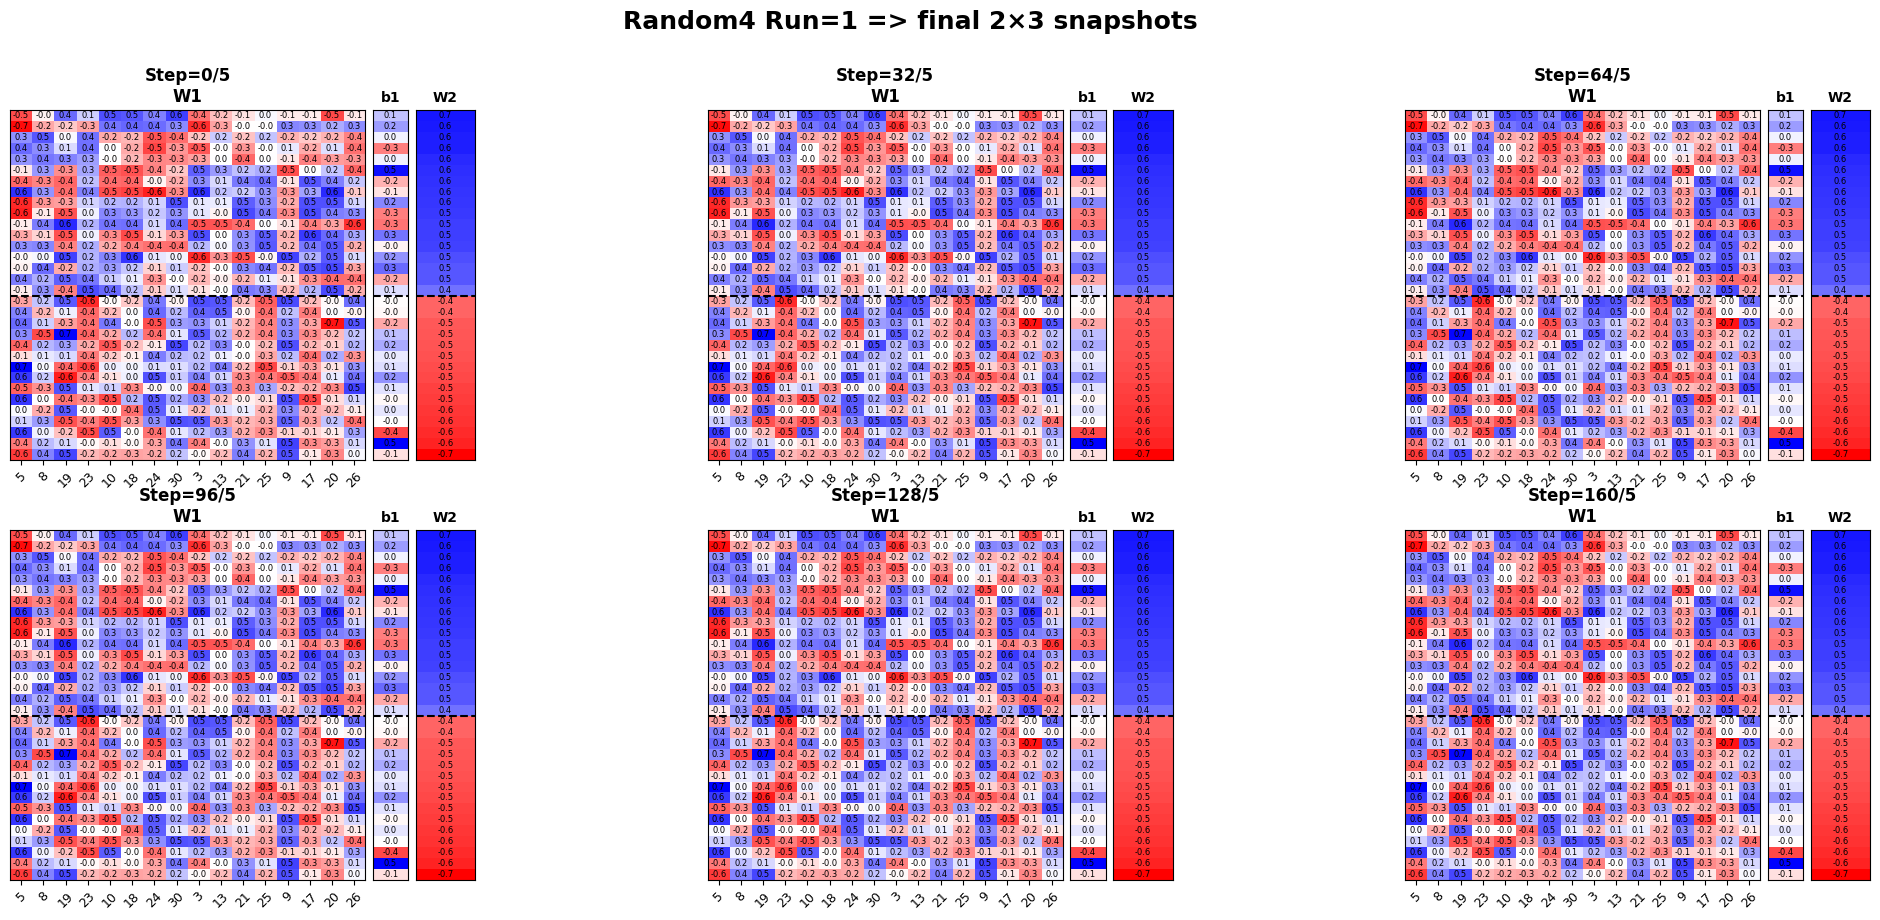

Saved => ./pdfs/Random4 Run=1_final_6snap_2x3.pdf


In [12]:
# Sum of x (set bits in relevant x_i) increasing
train_loader_xsum_inc = data.create_dataloader_sort_sumx(train_data, batch_size=64, increasing=True)
test_loader_xsum_inc = data.create_dataloader_sort_sumx(test_data, batch_size=64, increasing=True)

train.run_single_model(
    run_i=0,
    aggregator_steps=agg_steps,
    plot_steps=plot_steps,
    input_dim=32,
    hidden_dim=32,
    num_features_per_clause=4,
    train_loader=train_loader_xsum_inc,
    test_loader=test_loader_xsum_inc,
    run_name="sort_xsum_inc",
    base_dir=".",
    l2_reg_factor=0,
    l1_reg_factor=1e-4,
    seed_offset=0,
    cset=formula
)

sort_xsum_dec: using new random 4-AND formula => [[(5, False), (8, False), (19, False), (23, False)], [(10, False), (18, False), (24, False), (30, False)], [(3, False), (13, False), (21, False), (25, False)], [(9, False), (17, False), (20, False), (26, False)]]
sort_xsum_dec: epoch=0/5, trainErr: 0.71, testErr: 0.52, 0P4N_pos: 4.00, 0P4N_neg: 4.00, 1P3N_pos: 18.00, 1P3N_neg: 9.00, 2P2N_pos: 27.00, 2P2N_neg: 23.00, 3P1N_pos: 24.00, 3P1N_neg: 12.00, 4P0N_pos: 3.00, 4P0N_neg: 4.00, total_kp_pos: 3.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 0.00, total_kp_neg: 4.00, sum_of_clauseOverlaps_kp_neg: 0.00, overlap_kp_neg_with_prior: 0.00
sort_xsum_dec: epoch=0/5, trainErr: 0.71, testErr: 0.52, 0P4N_pos: 4.00, 0P4N_neg: 4.00, 1P3N_pos: 18.00, 1P3N_neg: 9.00, 2P2N_pos: 27.00, 2P2N_neg: 23.00, 3P1N_pos: 24.00, 3P1N_neg: 12.00, 4P0N_pos: 3.00, 4P0N_neg: 4.00, total_kp_pos: 3.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 3.00, total_kp_neg: 4.00, sum_of_c

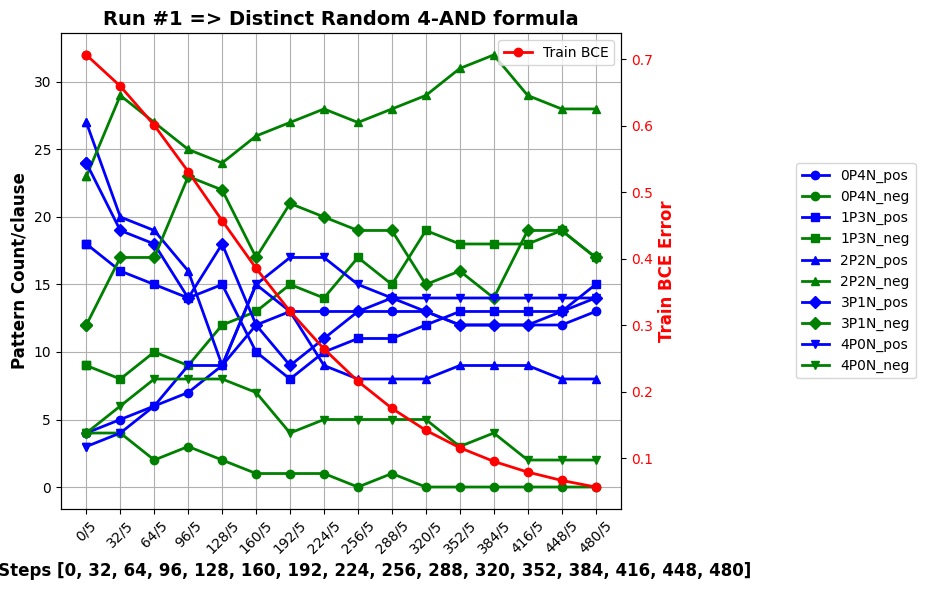

/home1/czhang/Neural-Computation/stats.py:347: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0,0,1,0.93])


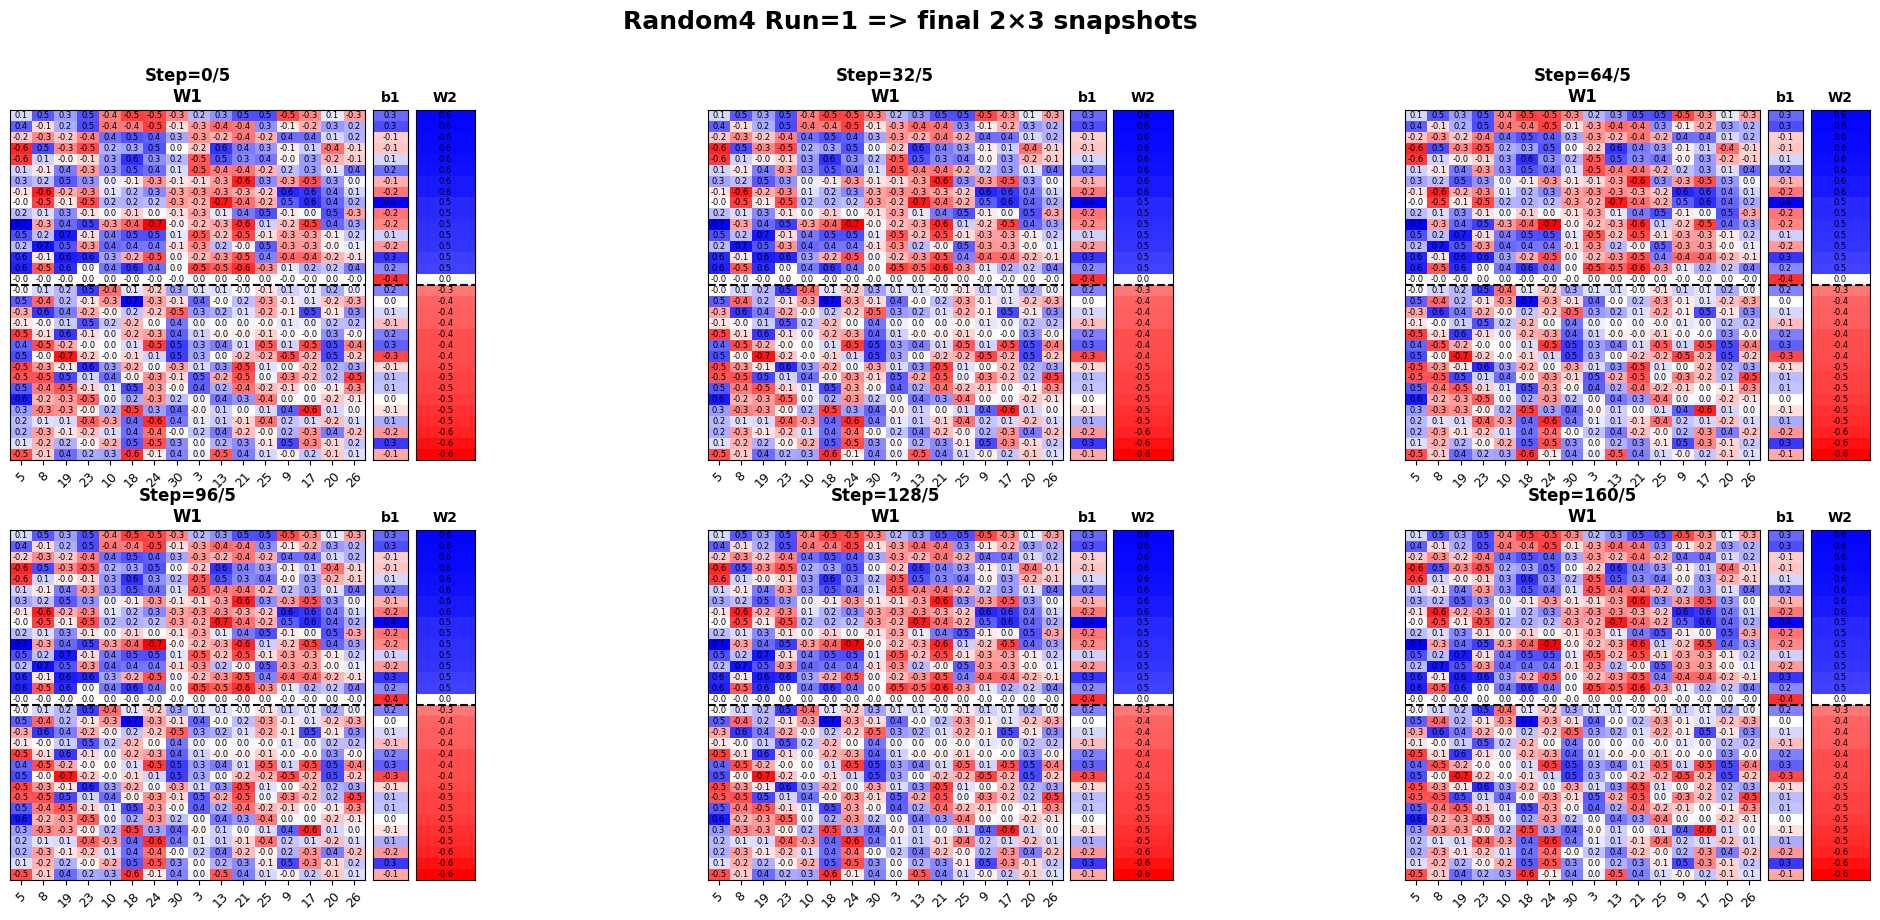

Saved => ./pdfs/Random4 Run=1_final_6snap_2x3.pdf


In [13]:
# Sum of x (set bits in relevant x_i) decreasing
train_loader_xsum_dec = data.create_dataloader_sort_sumx(train_data, batch_size=64, increasing=False)
test_loader_xsum_dec = data.create_dataloader_sort_sumx(test_data, batch_size=64, increasing=False)

train.run_single_model(
    run_i=0,
    aggregator_steps=agg_steps,
    plot_steps=plot_steps,
    input_dim=32,
    hidden_dim=32,
    num_features_per_clause=4,
    train_loader=train_loader_xsum_dec,
    test_loader=test_loader_xsum_dec,
    run_name="sort_xsum_dec",
    base_dir=".",
    l2_reg_factor=0,
    l1_reg_factor=1e-4,
    seed_offset=0,
    cset=formula
)

Up the dataset size